# Intestinal organoid

In [11]:
import shutup
shutup.please()

import math
import scanpy as sc
import matplotlib.pyplot as plt
from tivelo.main import tivelo
from baseline import run_baseline
from tivelo.plotting.velo_vec_plot import scatter_gene

## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [12]:
data_name = "organoid"
data_path = "/lustre/project/Stat/s1155202250ShareData/datamuyang/scEUseq_organoids/organoids_processed.h5ad"
adata = sc.read(data_path)

group_key = "cell_type"
emb_key = "X_umap"
cluster_edges = [("Stem cells", "TA cells"), ("Stem cells", "Goblet cells")]

Let the .var_names of adata be the name of genes.

In [13]:
adata.var_names = adata.var["gene"]

Set the model parameters.

In [14]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = "Gcnt4"
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

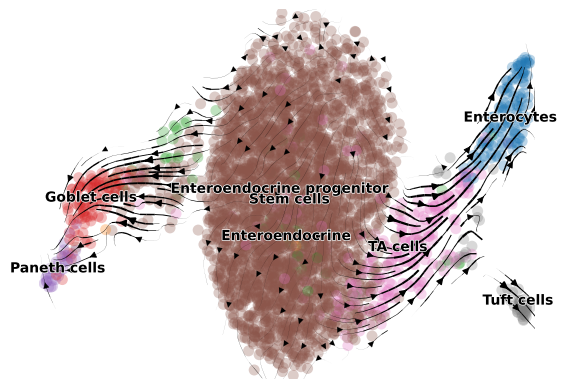

TIVelo:
 CBDir: 0.4658 ICVCoh: 0.6079 
 CBDir2: 0.4240 ICVCoh2: 0.4995 
 TransProbs: 0.3535 VeloCoh: 0.3891


In [15]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

Generate the scatter $u$-$s$ plot for single genes.

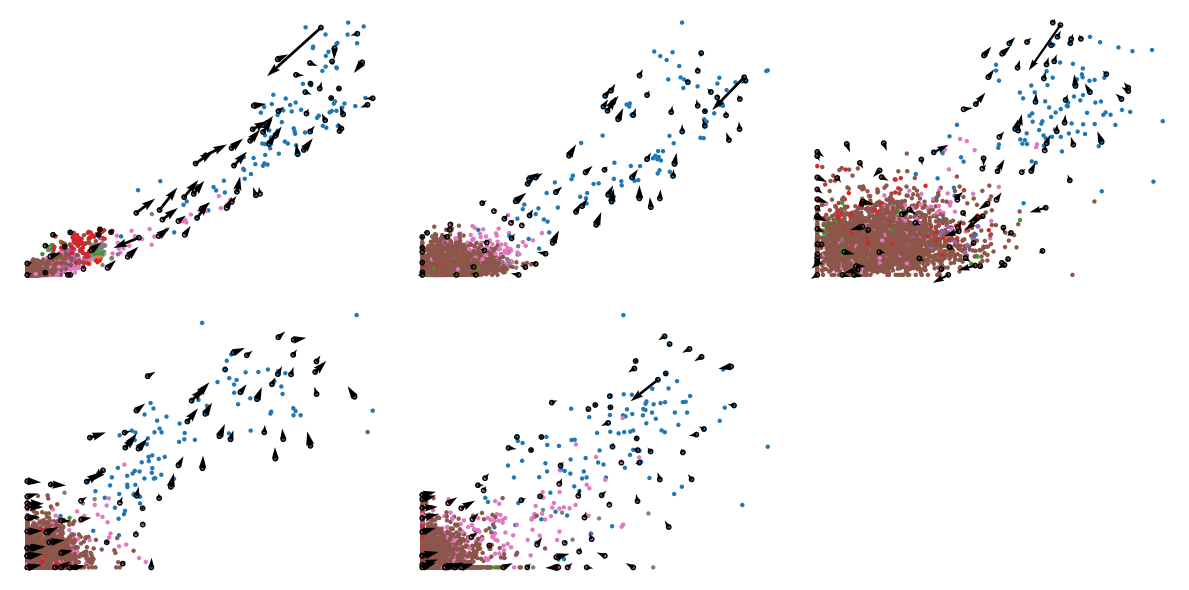

In [16]:
ncols = 3
gene_list = ["Ndrg1", "Dhrs1", 'Gramd3', "Cdr2", "Slc7a9"]
scale_list = [5, 5, 2, 2, 2]
height = math.ceil(len(gene_list) / ncols) * 3
fig = plt.figure(figsize=(4 * ncols, height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list) / ncols), ncols, i + 1)
    scatter_gene(adata_, velocity_key="velocity", gene_name=gene_list[i], ax=ax, color=group_key,
                 key_cluster="Granule mature", length_scale=scale_list[i])
    ax.axis('off')

fig.tight_layout()
plt.savefig(save_folder + "/{}/figs/scatter_genes.png".format(data_name))

## Run scVelo
Stochastic mode.

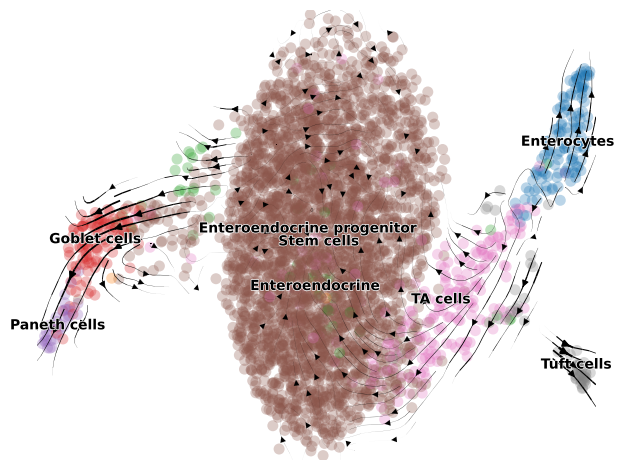

scvelo:
 CBDir: 0.0487 ICVCoh: 0.8776 
 CBDir2: 0.0453 ICVCoh2: 0.5800 
 TransProbs: 0.0859 VeloCoh: 0.0581


In [17]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

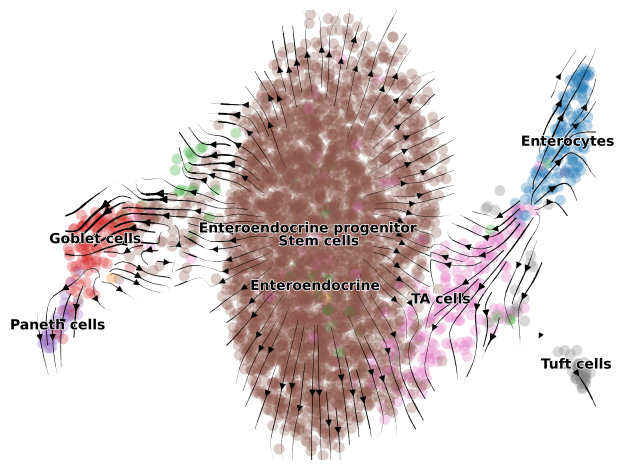

scvelo2:
 CBDir: -0.1114 ICVCoh: 0.7879 
 CBDir2: 0.0675 ICVCoh2: 0.4437 
 TransProbs: 0.1783 VeloCoh: 0.0295


In [18]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

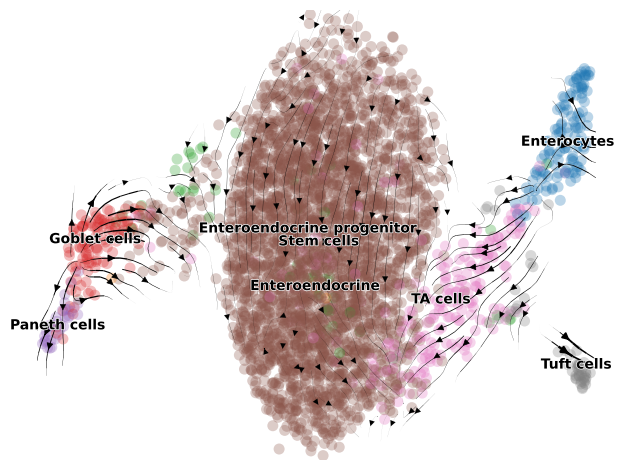

velovi:
 CBDir: -0.2521 ICVCoh: 0.8809 
 CBDir2: 0.0736 ICVCoh2: 0.5920 
 TransProbs: 0.0555 VeloCoh: 0.1215


In [19]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

In [20]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

------> Manully Specified Parameters <------
MAX_ITER:	10000
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /lustre/project/Stat/s1155202250/fastfolder/code/muyang/tivelo/docs/source/notebooks/notebooks.
Results will be stored in res folder
Extracted 1870 highly variable genes.
Computing moments for 1870 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 416 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 397 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 397 (Criterion: genes have reads in more than 5% of total cells)
Using GPU card: 0


ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

## Run cellDancer

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


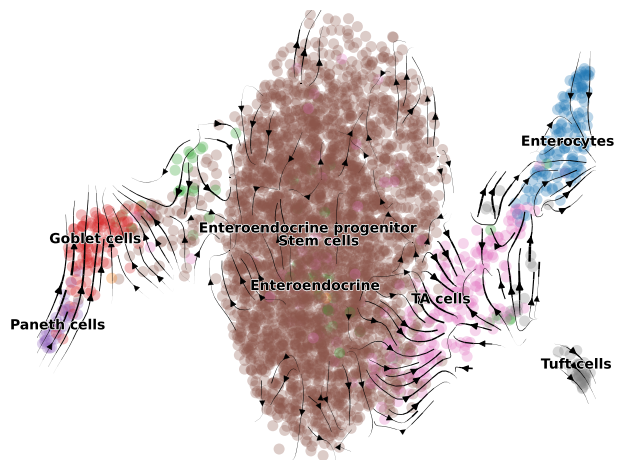

celldancer:
 CBDir: 0.2645 ICVCoh: 0.9125 
 CBDir2: 0.0984 ICVCoh2: 0.4553 
 TransProbs: 0.0546 VeloCoh: -0.1559


In [ ]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)